# Исследование объявлений о продаже квартир

Использованы данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Будем определять рыночную стоимость объектов недвижимости, установим параметры, которые влияют на цену. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах(м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

**Структура работы**

1. [Загрузка данных и первый взгляд](#data_import)
    - [Вывод](#conclusion_1)
2. [Предобработка данных](#processing)
    - [Вывод](#conclusion_2)
3. [Добавление переменных в базу](#formatting)
4. [Распределение данных, очистка от выбросов](#distribution)
    - [Вывод](#conclusion_3)
5. [Влияние параметров на цену недвижимости](#factors)
    - [Вывод](#conclusion_4)
6. [Анализ по сегментам](#segments)
    - [Топ 10 городов](#top_10)
    - [Санкт-Петербург](#stp)
    - [Вывод](#conclusion_5)
7. [Общий вывод](#conclusion_final)

<a id="data_import"></a>
## Загрузка данных и первый взгляд

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Начнем с изучения пропущенных  значений и построения предположений, с чем могут быть связаны пропуски.

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
df.isna().mean().sort_values(ascending=False) * 100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
ponds_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
first_day_exposition     0.000000
last_price               0.000000
total_area               0.000000
studio                   0.000000
rooms                    0.000000
floor                    0.000000
open_plan                0.000000
total_images             0.000000
dtype: float64

Практически в половине переменных встречаются пропущенные значения.

В переменной `is_apartment` их вовсе **88%**. Вероятно, эта информация заполняется пользователями, которые в случае, когда недвижимость не является аппартаментами, оставляют соответствующую ячейку пустой. Информация о количестве балконов, предположительно, пропущена в **48%** случаев по той же причине.

Информация о ближайших парках и водоемах пропущена почти в **3** раза чаще, чем о парках и водоемах в радиусе 3 км. Скорее всего, эти данные заполнялись автоматически и в первом случае для определения ближайшего объекта был настроен фильтр по расстоянию менее 3 км.

Высота потолков не указана более, чем в трети данных. Похоже на ручной ввод, как в случае с `is_appartment`, только на этот раз авторы объявлений просто не знают точную высоту потолков.

Данные о расстоянии до аэропортов и центра города в четверти случаев отсутствуют. Их желательно восстановить, потому что они могут влиять на цену. Следует проверить, связаны ли такие пропуски с тем, что недвижимость находится в пригородах Санкт-Петербурга.

В 13% случаев отсутствет информация о сроках размещения объявления. Наверное, это еще актуальные предложения.

Около 10% объявлений не имеют сведений о жилой площади и размерах кухни.

Помимо пропусков есть необходимость поправить типы данных в некоторых переменных. Дату размещения можно преобразовать в формат *datetime*, количество этажей, балконов, соседних парков и водоемов можно преобразовать в целочисленные значения. Расстояние до аэропортов и центра города тоже можно представить целочисленными, поскольку оно измеряется в метрах, а такой точности нам вполне достаточно. Скорее всего переменные с плавающей запятой возникли из-за наличия в них пропущенных значений (NaN в действительности является числом чуть больше 0).

<a id="conclusion_1"></a>
### Вывод
База имеет значительное количество пропущенных значений для половины переменных. Некоторые колонки заполнены чуть менее, чем на половину.

У части переменных требуется заменить тип данных.


<a id="processing"></a>
## Предобработка данных

In [5]:
df['is_apartment'] = df['is_apartment'].fillna(0)
df['balcony'] = df['balcony'].fillna(0)

Данные о количестве балконов и о том, является ли недвижимость апартаментами, заполнены. Теперь посмотрим, можно ли что-то сделать с информацией о расстояниях до парков, водоемов и других объектов. В каких населенных пунктах пропущены такие данные?
- Узнаем, сколько населенных пунктов в базе.
- Посмотрим на соотношение количества населенных пунктов с пропущенными значениями к общему числу населенных пунктов.

In [6]:
len(df['locality_name'].unique())

365

In [7]:
objs = ['parks_nearest', 'ponds_nearest', 'airports_nearest', 'cityCenters_nearest', 'ponds_around3000', 'parks_around3000']
missed = pd.DataFrame()
missed['total'] = [len(df['locality_name'].unique())]
for i in objs:
    missed[i] = [len(df[df[i].isna()]['locality_name'].unique())]
missed

,total,parks_nearest,ponds_nearest,airports_nearest,cityCenters_nearest,ponds_around3000,parks_around3000
0,365,365,361,345,346,345,345


Не удалось выявить небольшой список городов с пропущенными значениями ни в одной из переменных. Лучшей стратегией было бы оставить эти пропуски без изменений.

Высоту потолка можно заполнить медианным значением в группах по населенным пунктам и этажности здания. Предварительно удалим строки с пропущенным населенным пунктом и этажностью, их менее 1%. Также поделим этажность зданий на группы.

In [8]:
df = df.dropna(subset=['locality_name', 'floors_total'])

In [9]:
df['floors_total'].value_counts()

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [10]:
def group_floors(floors):
    if floors < 6:
        return 1
    if floors < 10:
        return 2
    if floors < 17:
        return 3
    else:
        return 4

In [11]:
df['floor_group'] = df['floors_total'].apply(group_floors)

In [12]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby(['locality_name', 'floor_group'])['ceiling_height'].transform('median'))

In [13]:
len(df[df['ceiling_height'].isna()])

157

Несмотря на замену, все равно остались пропущенные значения. Видимо, некоторые из групп, по которым проходило заполнение, полностью оказались состоящими из пропущенных значений. Заполним оставшиеся пропуски медианой по этажной группе.

In [14]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floor_group')['ceiling_height'].transform('median'))

In [15]:
len(df[df['ceiling_height'].isna()])

0

Теперь для всех объявлений у нас есть высота потолков.

In [16]:
df.isna().mean().sort_values(ascending=False) * 100

parks_nearest           65.924040
ponds_nearest           61.654997
airports_nearest        23.441545
cityCenters_nearest     23.343942
ponds_around3000        23.339699
parks_around3000        23.339699
days_exposition         13.456397
kitchen_area             9.429238
living_area              7.914280
floor_group              0.000000
floors_total             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
open_plan                0.000000
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
balcony                  0.000000
locality_name            0.000000
total_images             0.000000
dtype: float64

Осталось заполнить пропуски в `days_exposition`, а также жилой площади и размерах кухни. `days_exposition` оставим как есть - это объявления, которые еще не сняты. Незаполненную площадь будем искать по средней доле этих площадей от общего размера квартиры.

In [17]:
mean_kitchen = df['kitchen_area'].sum()/df['total_area'].sum()
mean_living = df['living_area'].sum()/df['total_area'].sum()

In [18]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * mean_kitchen)
df['living_area'] = df['living_area'].fillna(df['total_area'] * mean_living)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around30

Пропущенные значения заменены, где это было возможно. Теперь можно заняться типами данных.

In [20]:
df['first_day_exposition'] =  pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['floors_total'] = df['floors_total'].astype('int')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['balcony'] = df['balcony'].astype('int')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around

<a id="conclusion_2"></a>
### Вывод
Заполнены пропущенные значения:
- `is_appartment` - пропуски заменены на **0**
- пропуски в балконах заменены на **0**
- высота потолков заполнена медианным значением в данных, сгруппированных по населенному пункту и этажности зданий
- пропуски в жилой площади и площади кухне заменены на среднюю долю этих помещений от общей площади квартиры.
Заменены типы данных:
- дата размещения - в формат даты из строки
- количество этажей - в целочисленное значение
- `is_appartment` - в булево значение
- количество балконов - в целочисленное значение.

Остальные пропуски оставлены без изменений. В базе множество пропусков разной природы. Некоторые вызваны тем, что люди при размещении объявления не заполняют некоторые поля (например, не пишут *0*, если нет балконов). Другие связаны со спецификой работы алгоритмов: наличие парков поблизости, расстояние до центра города или аэропорта не указано во многих городах.

<font color='green'>Итак, предобработка определенно удалась, применены верные методы, пропуски, насколько это возможно, обработаны с опорой на прочие имеющиеся параметры, данные приведены к удобным типам. 

<a id="formatting"></a>
## Добавление переменных в базу

Для дальнейшей работы добавим некоторые переменные в базу:
- цену за $м^2$
- день недели размещения объявления
- месяц размещения объявления
- год размещения объявления

In [22]:
df['price_m2'] = df['last_price'] / df['total_area']
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df['weekday'] = df['first_day_exposition'].dt.weekday

- категорию этажа квартиры: первый/последний/другой

In [23]:
df['floor_status'] = 'другой'
last = df['floor'] != df['floors_total']
first = df['floor'] != 1
df['floor_status'] = df['floor_status'].where(first, 'первый')
df['floor_status'] = df['floor_status'].where(last, 'последний')

- долю жилой площади от общей
- долю площади кухни от общей

In [24]:
df['living_area_part'] = df['living_area'] / df['total_area']
df['kitchen_area_part'] = df['kitchen_area'] / df['total_area']

<a id="distribution"></a>
## Распределение данных, очистка от выбросов

Посмотрим как распределены данные в наших данных. Начнем с общей площади квартиры.

In [25]:
df['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Третий квартиль имеет значение около 70 $м^2$, в то время, как самая большая квартира имеет размеры 900 $м^2$. Очевидно, в данных присутствует большое количество выбросов с высоким значением общей площади. Взглянем на диаграмму разброса и гистограмму, чтобы принять решение о том, по какому значению общей площади ограничим базу для дальнейшего анализа.

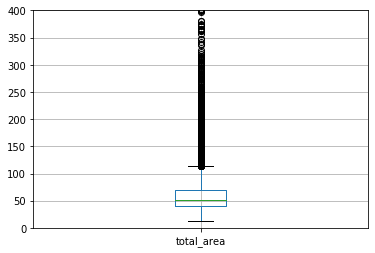

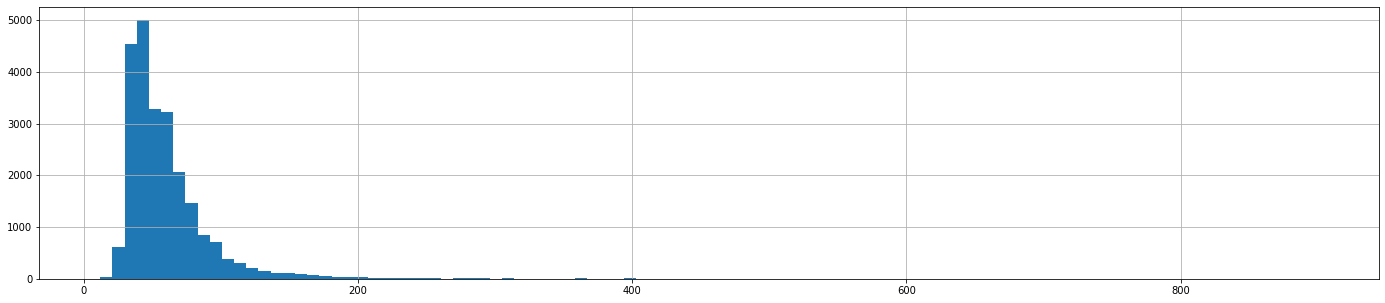

In [26]:
plt.ylim(0,400)
df.boxplot(column=['total_area'], figsize=(12,10))
plt.show()
df['total_area'].hist(bins=100, figsize=(24,5))
plt.show()

Как видно из диаграммы рассеяния, нормальные значения для площади квартиры лежат примерно в диапазоне от 12 до 120 $м^2$. Выбросы образуют довольно длинный "хвост", но уже после значения в 200 $м^2$ их становится крайне мало.

Далее рассмотрим распределение данных по цене квартиры. Для удобства создадим колонку `last_price_m`, в которой будем хранить цену в млн руб.

In [27]:
df['last_price_m'] = df['last_price'] / 1000000
df['last_price_m'].describe()

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price_m, dtype: float64

У цен квартир "хвост" еще более впечатляющий: верхний квартиль лежит в диапазоне от 6,79 до 763 млн руб., из-за чего стандартное отклонение почти в 2 раза больше среднего.

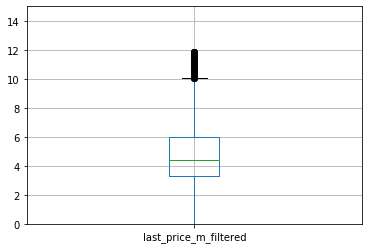

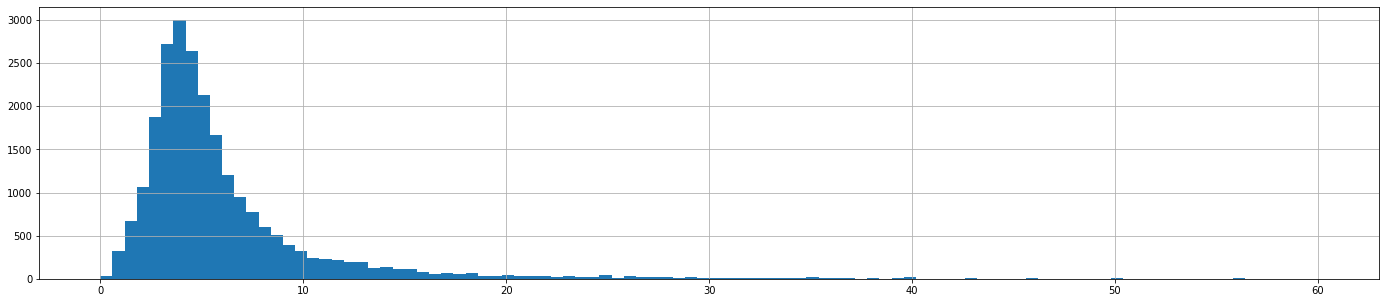

In [28]:
Q1 = df['last_price_m'].quantile(0.25)
Q3 = df['last_price_m'].quantile(0.75)
IQR = Q3 - Q1

filtered = df.query('(@Q1 - 1.5 * @IQR) <= last_price_m <= (@Q3 + 1.5 * @IQR)')

plt.ylim(0,15)
df.join(filtered, rsuffix='_filtered').boxplot(column=['last_price_m_filtered'], figsize=(10,10))
plt.show()
df['last_price_m'].hist(bins=100, figsize=(24,5), range=(0,60))
plt.show()

In [29]:
df.query('last_price_m < 0.1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,floor_group,price_m2,year,month,weekday,floor_status,living_area_part,kitchen_area_part,last_price_m
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,8.0,4,111.834862,2019,3,2,последний,0.293578,0.37156,0.01219


Судя по диаграмме размаха, нормальные значения для цены не превышают 10 млн руб., однако на гистограмме видно, что в диапазоне от 10 до 20 млн находится достаточно много значений, поэтому имеет смысл их сохранить. Минимальное значение всего 12 тыс. руб., его тоже следует исключить. Скорее всего это опечатка.

Перейдем к распределению по количеству комнат.

In [30]:
df['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

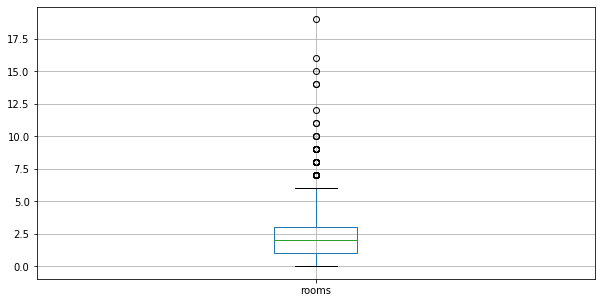

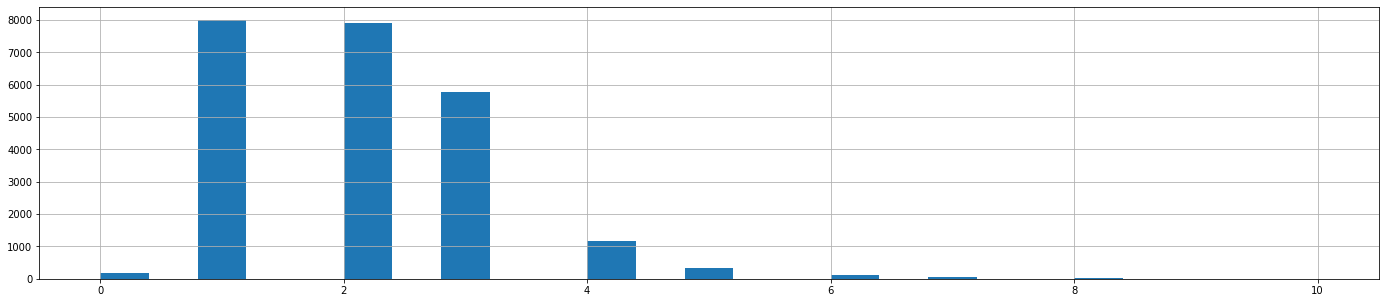

In [31]:
df.boxplot(column=['rooms'], figsize=(10,5))
plt.show()
df['rooms'].hist(bins=25, figsize=(24,5), range=(0,10))
plt.show()

In [32]:
len(df.query('rooms == 0'))

194

Уже знакомая ситуация с большим количеством выбросов будем рассматривать квартиры, в которых до 7 комнат. Есть квартиры с 0 комнат. Возможно, это студии.

Далее разберем высоту потолков.

In [33]:
df['ceiling_height'].describe()

count    23565.000000
mean         2.735334
std          1.013059
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [34]:
len(df.query('ceiling_height == 100'))

1

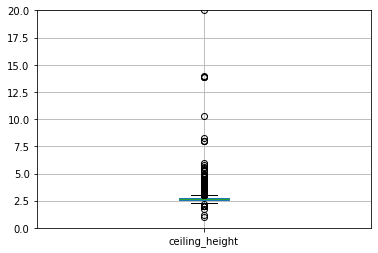

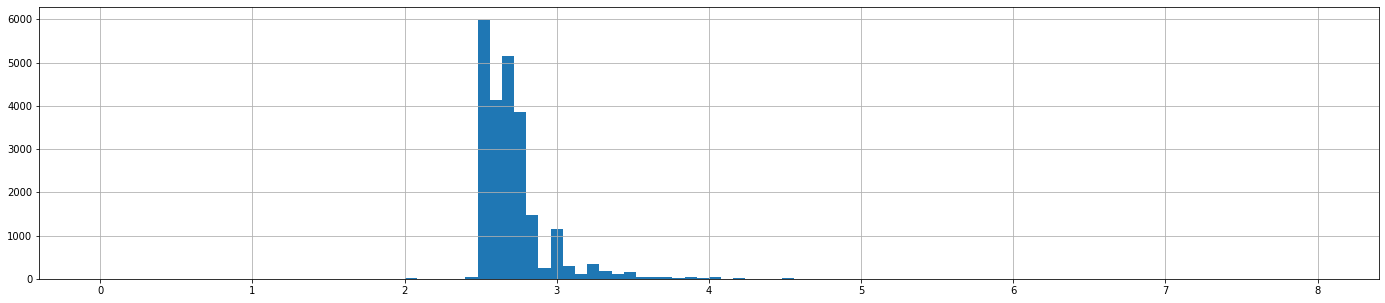

In [35]:
plt.ylim(0,20)
df.boxplot(column=['ceiling_height'], figsize=(10,5))
plt.show()
df['ceiling_height'].hist(bins=100, figsize=(24,5), range=(0,8))
plt.show()

Есть аномальная квартира со стометровыми потолками. Практически все квартиры имеют потолки не выше 4 м. Минимальная высота потолков чуть больше метра. Примем нижнюю границу за 2 м.

Наконец, рассмотрим, сколько дней объявления проводят на сайте до снятия.

In [36]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

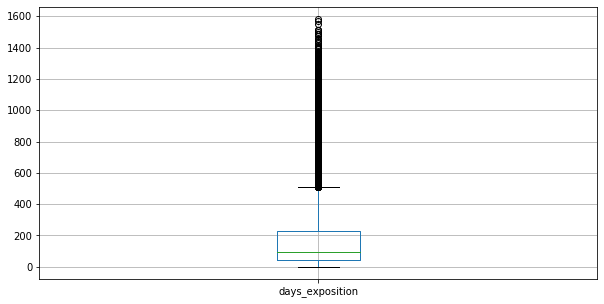

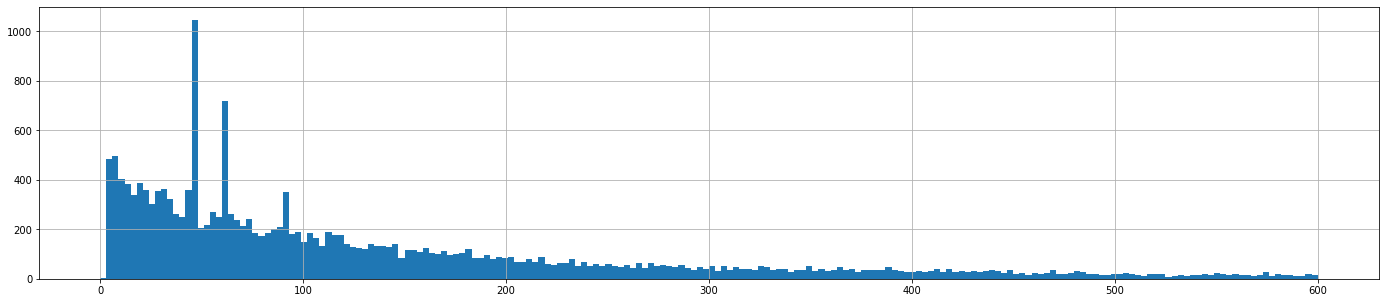

In [37]:
df.boxplot(column=['days_exposition'], figsize=(10,5))
plt.show()
df['days_exposition'].hist(bins=200, figsize=(24,5), range=(0,600))
plt.show()

In [38]:
Q1 = df['days_exposition'].quantile(0.25)
Q3 = df['days_exposition'].quantile(0.75)
IQR = Q3 - Q1

print('Среднее время продажи: {}'.format(int(df['days_exposition'].mean())))
print('Медианное значение времени продажи: {}'.format(int(df['days_exposition'].median())))
print('Максимальное нормальное значение для срока продажи: {}'.format(int(Q3 + 1.5 * IQR)))
print('Процент объявлений, снятых в течение первой недели: {}%'.format(round(len(df.query('3 < days_exposition < 8')) / len(df) * 100, 2)))
print('Процент объявлений, снятых в течение 3 дней после размещения: {}%'.format(round(len(df.query('3 < days_exposition < 4')) / len(df) * 100, 2)))

Среднее время продажи: 180
Медианное значение времени продажи: 95
Максимальное нормальное значение для срока продажи: 510
Процент объявлений, снятых в течение первой недели: 3.57%
Процент объявлений, снятых в течение 3 дней после размещения: 0.67%


Можно сказать, что нормальный срок продажи квартиры от 4 дней до 3 месяцев. Продажу квартиры в течение 3 дней можно считать слишком быстрой, а дольше 510 дней - слишком долгой.

Создадим таблицу `clean_df` на основе имеющейся, отбросив редкие и выбивающиеся значения из имеющейся `df`.

In [39]:
clean_df = df.query('total_area <= 200 and 0.1 < last_price_m <= 20 and rooms < 7 and 2 <= ceiling_height <= 4 and days_exposition <= 510')
len(clean_df) / len(df)

0.773520050922979

<a id="conclusion_3"></a>
### Вывод

Плохая новость: после удаления выбросов база данных уменьшилась почти на четверть.

Хорошая новость: на очищенных данных можно посмотреть, как различные факторы влияют на цену квартиры. Посмотрим на корреляцию цены квартиры и следующих параметров:
- площадь квартиры
- количество комнат
- удаленность от центра

<a id="factors"></a>
## Влияние параметров на цену недвижимости

Корреляция: 0.77


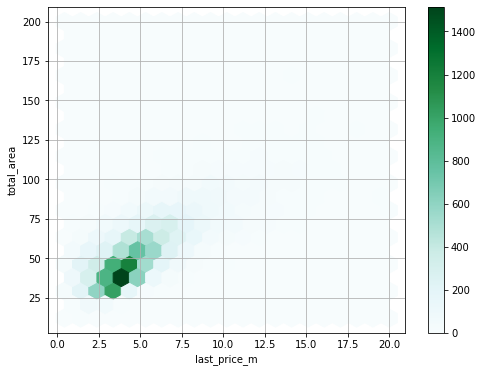

In [40]:
clean_df.plot(x='last_price_m', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
print('Корреляция:', round(clean_df['last_price_m'].corr(clean_df['total_area']), 2))

Корреляция: 0.5


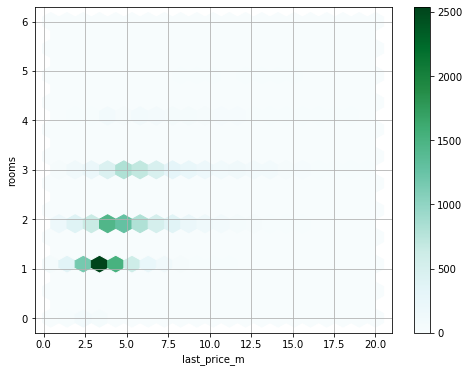

In [41]:
clean_df.plot(x='last_price_m', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
print('Корреляция:', round(clean_df['last_price_m'].corr(clean_df['rooms']), 2))

Корреляция: -0.35


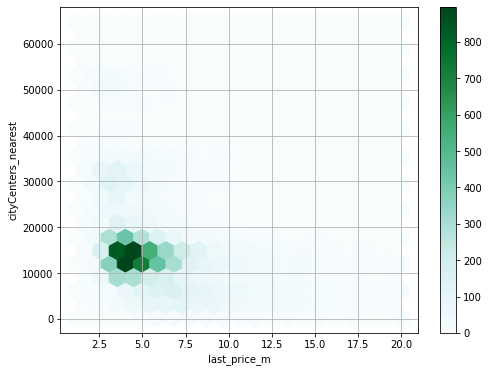

In [42]:
clean_df.plot(x='last_price_m', y='cityCenters_nearest', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
print('Корреляция:', round(clean_df['last_price_m'].corr(clean_df['cityCenters_nearest']), 2))

Достаточно сильная связь между ценой и площадью квартиры, что не удивительно. Количество комнат средне связано с ценой: общая площадь важнее. Наконец, удаленность от центра достаточно слабо влияет на цену квартиры. Здесь нужно учитывать, что в данных об удаленности от центра много пропусков, это может искажать результаты.

Теперь построим матрицу корреляции, чтобы понять, не пропустили мы какие-то переменные, которые сильно связаны сценой.

In [43]:
mxdf = clean_df[['total_images', 'last_price', 'total_area',
                 'rooms', 'ceiling_height', 'floors_total',
                 'balcony', 'airports_nearest', 'cityCenters_nearest',
                 'parks_nearest', 'ponds_nearest']]

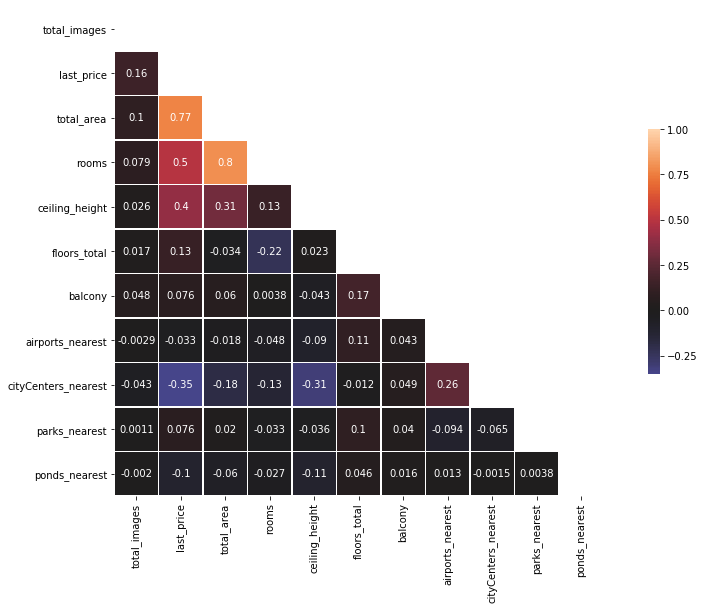

In [65]:
corr = mxdf.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(16,9))
sns.heatmap(corr, mask=mask, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Новых значимых переменных матрица корреляции не показала. Значит, мы ничего не упускаем, можем продолжать анализ.

Из интересного: между расстоянием до центра и высотой потолков обратная связь, то есть, чем ближе квартира к центру, тем выше в ней потолки и наоборот.

Дальше попробуем разобраться, как этаж влияет на цену? Ранее мы разбили этажи на категории: первый, последний, другой. Посмотрим на связь между ценой и категорией этажа.

другой count    13575.000000
mean         5.380883
std          2.953199
min          0.450000
25%          3.500000
50%          4.599000
75%          6.399500
max         20.000000
Name: last_price_m, dtype: float64
первый count    2189.000000
mean        4.195462
std         2.400464
min         0.440000
25%         2.730000
50%         3.750000
75%         5.000000
max        20.000000
Name: last_price_m, dtype: float64
последний count    2464.000000
mean        4.861953
std         3.065382
min         0.430000
25%         2.950000
50%         4.100000
75%         5.880000
max        19.900000
Name: last_price_m, dtype: float64


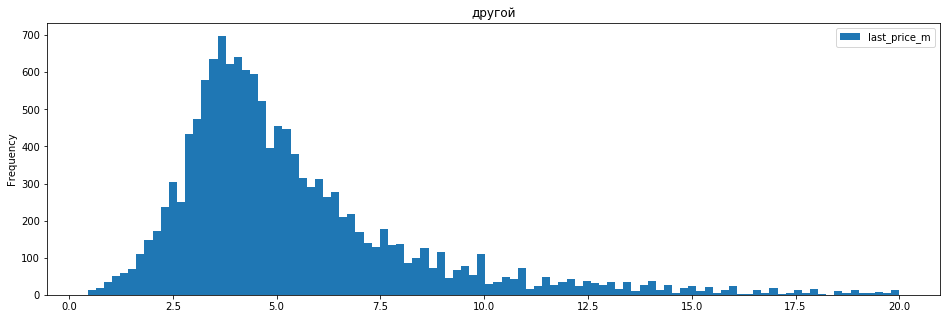

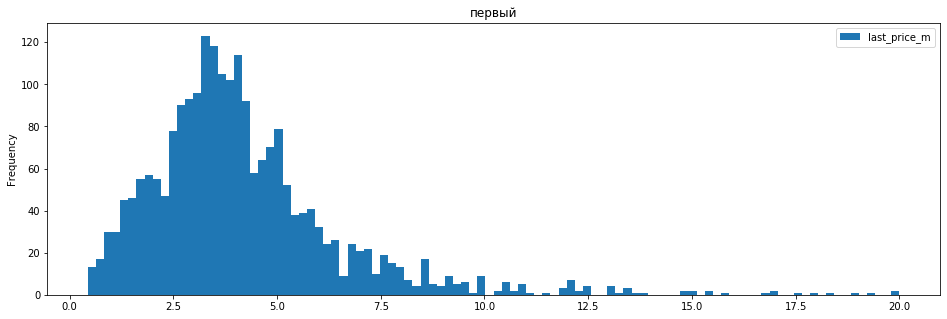

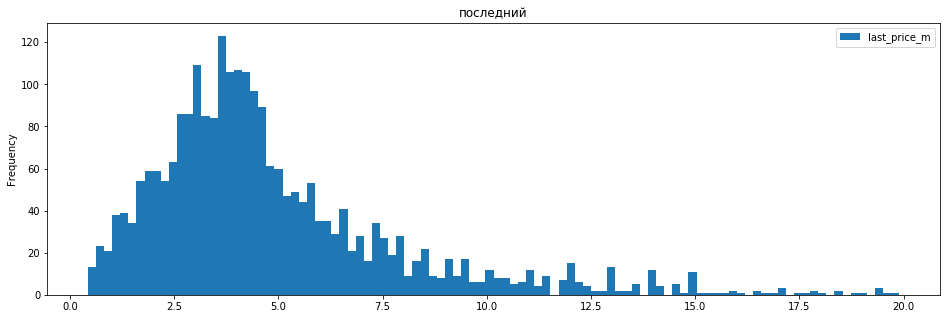

In [45]:
for group, group_data in clean_df.groupby('floor_status'):
    print(group, group_data['last_price_m'].describe())
    group_data.plot(y='last_price_m', title=group, kind='hist', bins=100, figsize=(16,5))

Цены квартир на последнем и первом этаже в среднем ниже, чем на остальных. Цены на квартиры на последнем этаже имеют наибольшее стандартное отклонение. Вероятно, это связано с тем, что на последних этажах бывают как малопривлекательные квартиры (с протекающей крышей, например), так и наоборот (с мансардой или выходом на крышу).

Теперь узнаем, как день недели, месяц и год размещения объявления связаны с ценой.

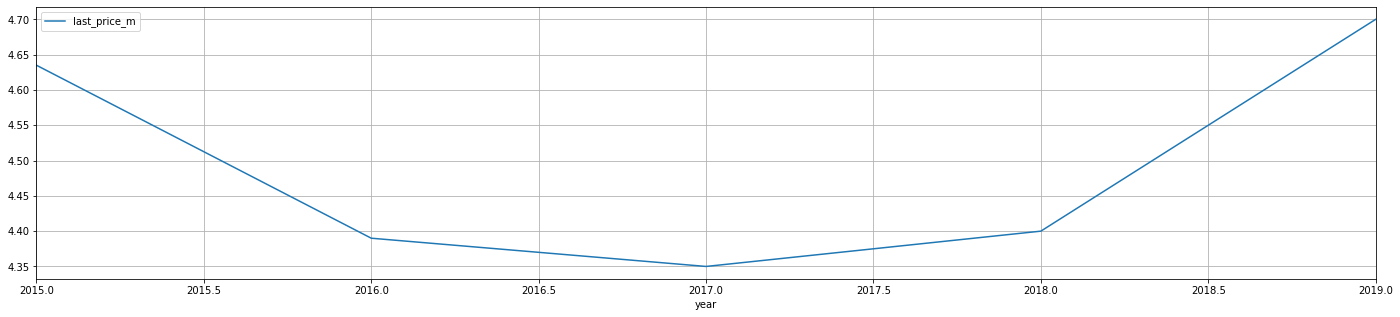

In [46]:
(clean_df
         .pivot_table(index='year', values='last_price_m', aggfunc='median')
         .plot(grid=True, figsize=(24,5))

)

С 2015 по 2017 цены на недвижимость падали, а с 2018 стали резко расти и к 2019 обогнали цены 2015го года.

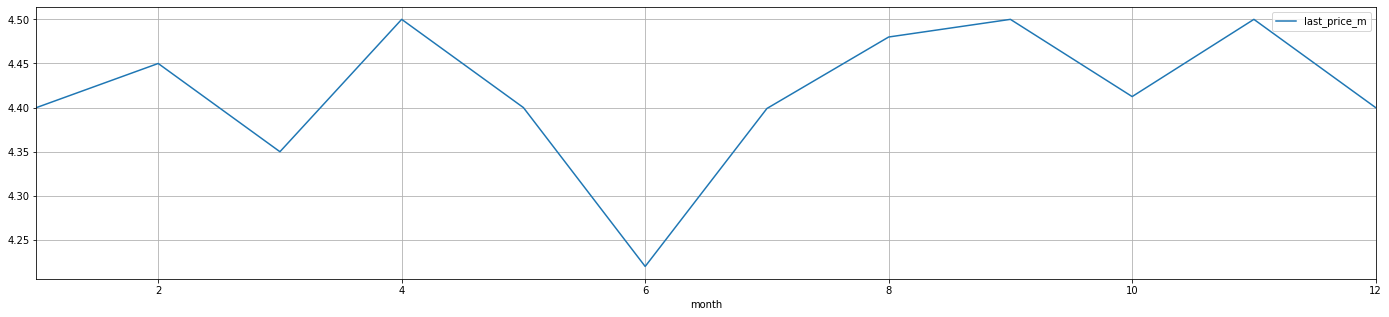

In [47]:
(clean_df
         .pivot_table(index='month', values='last_price_m', aggfunc='median')
         .plot(grid=True, figsize=(24,5))

)

С апреля по июнь цены резко падают, с июня до августа восстанавливаются. Получается, что в середине года люди заинтересованы в том, чтобы быстрее продать недвижимость.

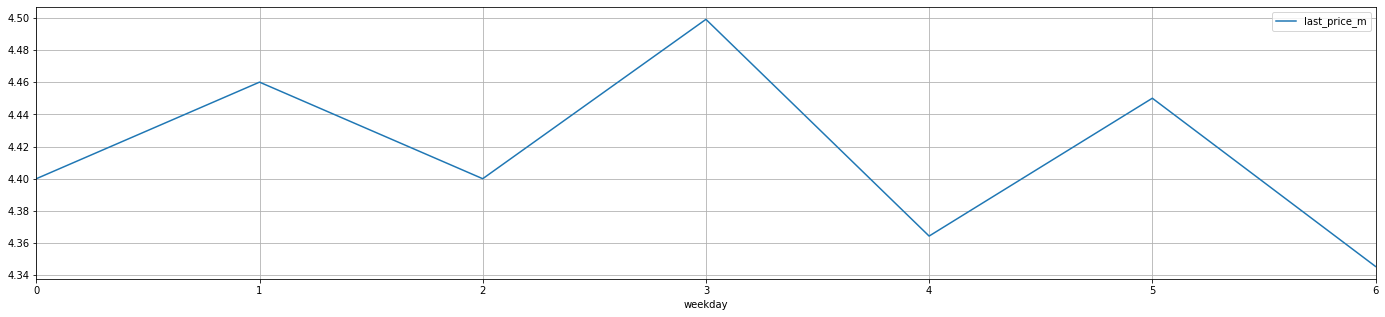

In [48]:
(clean_df
         .pivot_table(index='weekday', values='last_price_m', aggfunc='median')
         .plot(grid=True, figsize=(24,5))

)

Самые высокие цены в четверг, а самые низкие в воскресенье.

Графики по месяцам и по дням недели ломаные, сложно выделить какой-то тренд или закономерность.

<a id="conclusion_4"></a>
### Вывод
- Цена квартиры предсказуемо сильно зависит от площади
- Расстояние до центра на цену влияет достаточно слабо. Это удивительно, хотя может быть связано с наличием пропусков
- Цены на последнем и первом этаже в среднем ниже, чем на остальных
- Самое большое стандартное отклонение у цен на квартиры на последнем этаже. Квартиры на последнем этаже сильно различаются в классе от дома к дому.
- С 2015 по 2017 год цены падали, к 2019 они обогнали цены 2015го года.
- Динамика цен по дням недели ломаная, сложно выделить однозначный тренд.
- С апреля по август цены падают. Вероятно, растет предложение, а собственники заинтересованы быстрее продать недвижимость.

<a id="segments"></a>
## Анализ по сегментам

<a id="top_10"></a>
### Топ 10 городов

Посмотрим, в каких населенных пунктах цена за $м^2$ выше. Возьмем топ 10 городов.

In [49]:
top_10_names = clean_df['locality_name'].value_counts().head(10).index
(clean_df
         .query('locality_name in @top_10_names')
         .pivot_table(index='locality_name', values='price_m2', aggfunc='mean')
         .sort_values(by='price_m2', ascending=False)
)

,price_m2
locality_name,
Санкт-Петербург,106978.660186
Пушкин,100467.511821
деревня Кудрово,92670.928672
посёлок Парголово,89336.954129
посёлок Мурино,85935.831374
посёлок Шушары,77769.604390
Колпино,74641.377188
Гатчина,68076.899010
Всеволожск,66673.335184


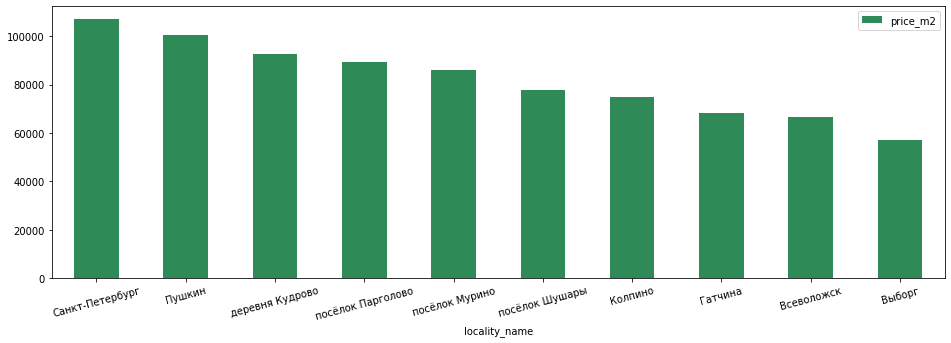

In [50]:
(clean_df
         .query('locality_name in @top_10_names')
         .pivot_table(index='locality_name', values='price_m2', aggfunc='mean')
         .sort_values(by='price_m2', ascending=False)
         .plot(kind='bar', figsize=(16,5), color='seagreen', rot=15)
)

Предсказуемо в топе оказались Санкт-Петербург и пригороды. Последнюю строчку топа занял Выборг - один из крупнейших городов Ленинградской области.

<a id="stp"></a>
### Санкт-Петербург

Проанализируем цены на квартиры в Санкт-Петербурге, самом крупном городе выборки. Сперва найдем границу, по которой проходит центр города и сравним данные по всему городу с центром. Для этого преобразуем переменную `cityCenters_nearest` из метров в километры и округлим. Затем сравним цены на квартиры в зависимости от удаленности от центра.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


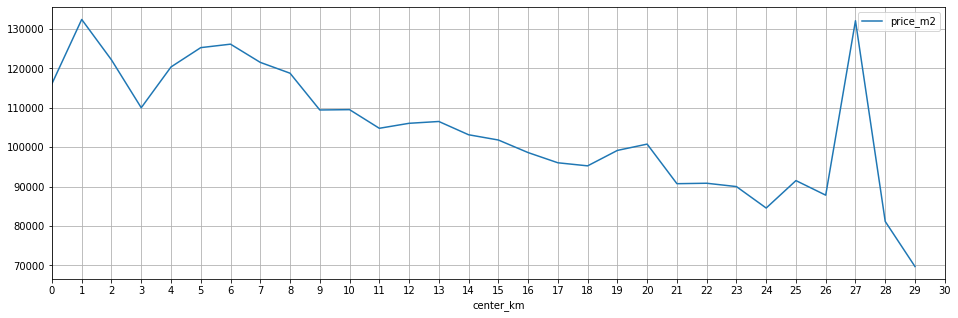

In [51]:
stp = clean_df.query('locality_name == "Санкт-Петербург"')
stp['center_km'] = round(stp['cityCenters_nearest'] / 1000)
(stp
         .pivot_table(index='center_km', values='price_m2')
         .plot(figsize=(16,5),grid=True, xticks=np.arange(0, 31, 1))
)

In [52]:
stp.query('1 < center_km < 4').sort_values(by='price_m2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,floor_group,price_m2,year,month,weekday,floor_status,living_area_part,kitchen_area_part,last_price_m,center_km
7756,1,4390000.0,151.8,2017-04-28,6,3.50,6,106.500000,6,False,...,2,28919.631094,2017,4,4,последний,0.701581,0.094203,4.390,2.0
2271,15,7480000.0,120.4,2017-09-05,4,2.92,3,67.200000,1,False,...,1,62126.245847,2017,9,1,первый,0.558140,0.151993,7.480,2.0
21497,10,9300000.0,147.8,2017-11-29,4,2.83,5,108.000000,4,False,...,1,62922.868742,2017,11,2,другой,0.730717,0.073072,9.300,2.0
3719,8,3100000.0,48.8,2017-05-12,1,2.60,6,28.900000,1,False,...,2,63524.590164,2017,5,4,первый,0.592213,0.247951,3.100,3.0
10190,17,11700000.0,182.0,2017-05-31,6,3.50,5,127.000000,4,False,...,1,64285.714286,2017,5,2,другой,0.697802,0.126374,11.700,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,20,20000000.0,81.0,2019-02-07,2,2.60,7,55.000000,5,False,...,2,246913.580247,2019,2,3,другой,0.679012,0.086420,20.000,2.0
10886,20,18500000.0,74.0,2018-11-18,3,3.65,4,52.000000,4,False,...,1,250000.000000,2018,11,6,последний,0.702703,0.121622,18.500,2.0
975,19,19999000.0,78.6,2018-09-19,3,2.96,6,50.200000,4,False,...,2,254440.203562,2018,9,2,другой,0.638677,0.127226,19.999,3.0
19766,20,20000000.0,70.0,2016-05-05,2,3.30,5,34.000000,3,False,...,1,285714.285714,2016,5,3,другой,0.485714,0.371429,20.000,2.0


На участке до 6 км от центра цена резко варьируется. Несмотря на сильный спад в диапазоне 1-3 км примем за центр расстояние в 6 км, поскольку дальше график достаточно равномерно снижается. Низкие цены в центре могут указывать на распродающиеся коммунальные квартиры без ремонта. На 27 км есть всплеск, посмотрим на него отдельно.

In [53]:
stp.query('center_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,floor_group,price_m2,year,month,weekday,floor_status,living_area_part,kitchen_area_part,last_price_m,center_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1,193918.918919,2017,11,1,другой,0.405405,0.337838,14.35,27.0
5961,6,2250000.0,32.0,2018-02-27,1,2.83,2,16.5,2,False,...,1,70312.500000,2018,2,1,последний,0.515625,0.218750,2.25,27.0


Здесь всего 2 квартиры, и только одна значительно превышает стоимость соседей. Скорее всего, владелец просто завысил стоимость.

Теперь сравним распределение данных по тем же переменным, что и для всей базы ранее: **площадь квартиры**, **цена**, **количество комнат** и **высота потолков**. Для каждой переменной построим распределение в центре Петербурга и в городе в целом.

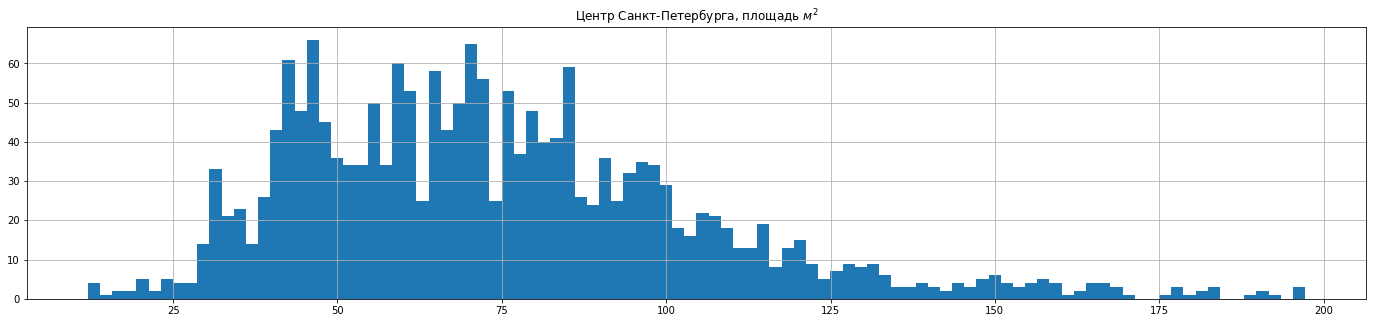

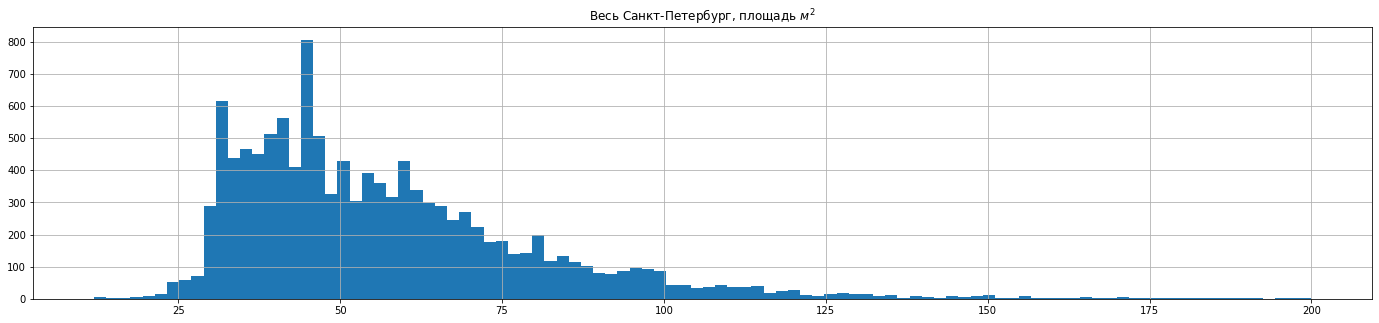

In [54]:
stp.query('center_km <= 6')['total_area'].hist(bins=100, figsize=(24,5))
plt.title('Центр Санкт-Петербурга, площадь $м^2$')
plt.show()
stp['total_area'].hist(bins=100, figsize=(24,5))
plt.title('Весь Санкт-Петербург, площадь $м^2$')
plt.show()

Квартиры в центре больше.

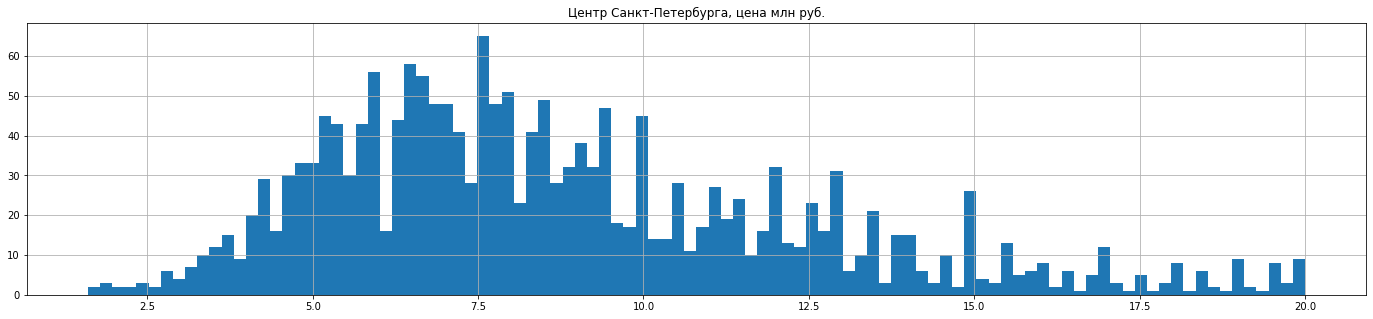

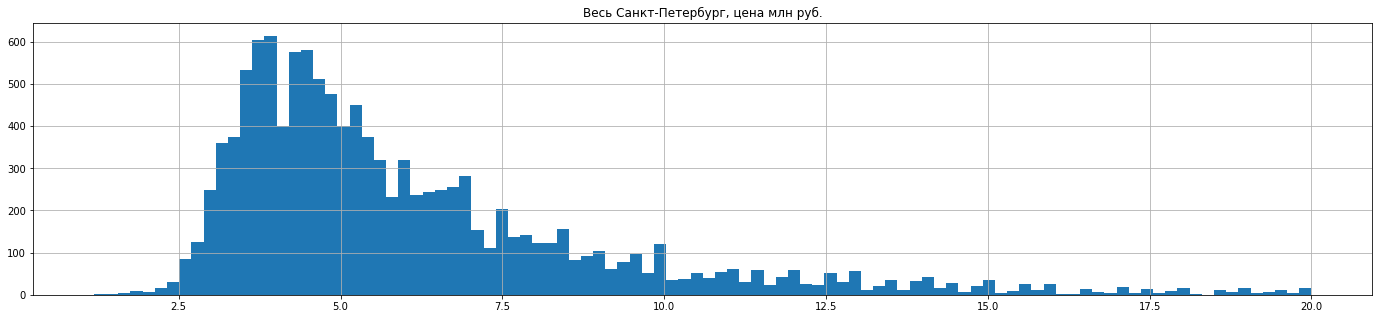

In [55]:
stp.query('center_km <= 6')['last_price_m'].hist(bins=100, figsize=(24,5))
plt.title('Центр Санкт-Петербурга, цена млн руб.')
plt.show()
stp['last_price_m'].hist(bins=100, figsize=(24,5))
plt.title('Весь Санкт-Петербург, цена млн руб.')
plt.show()

Стоят они, соответственно, дороже. Это было видно уже на графике, который мы строили для определения зоны центра.

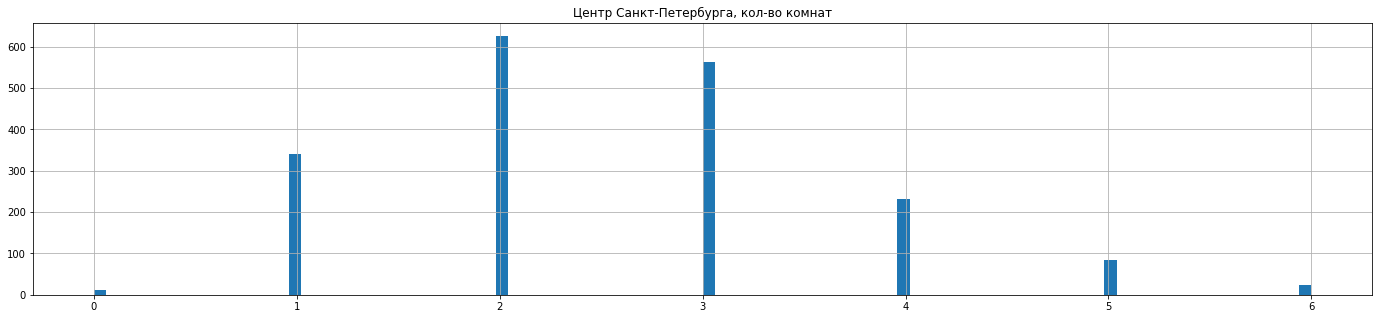

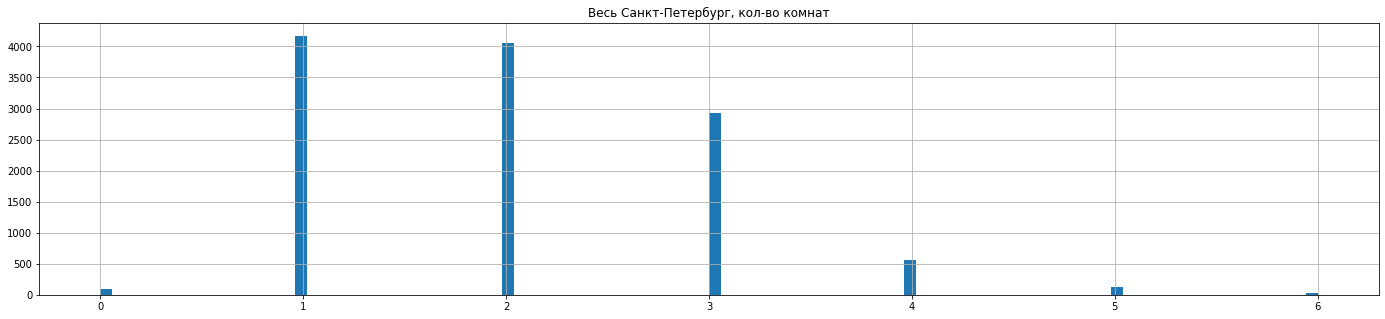

In [56]:
stp.query('center_km <= 6')['rooms'].hist(bins=100, figsize=(24,5))
plt.title('Центр Санкт-Петербурга, кол-во комнат')
plt.show()
stp['rooms'].hist(bins=100, figsize=(24,5))
plt.title('Весь Санкт-Петербург, кол-во комнат')
plt.show()

В центре меньше доля однокомнатных квартир и выше доля 4-6 комнатных.

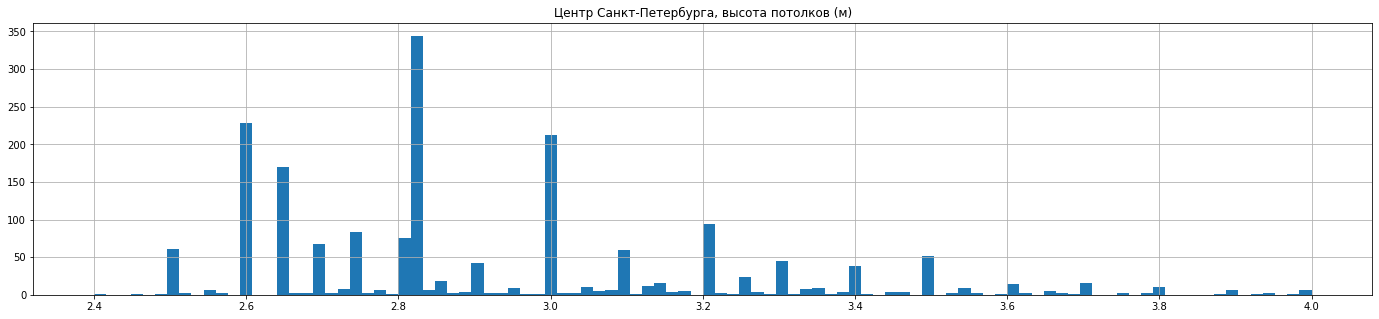

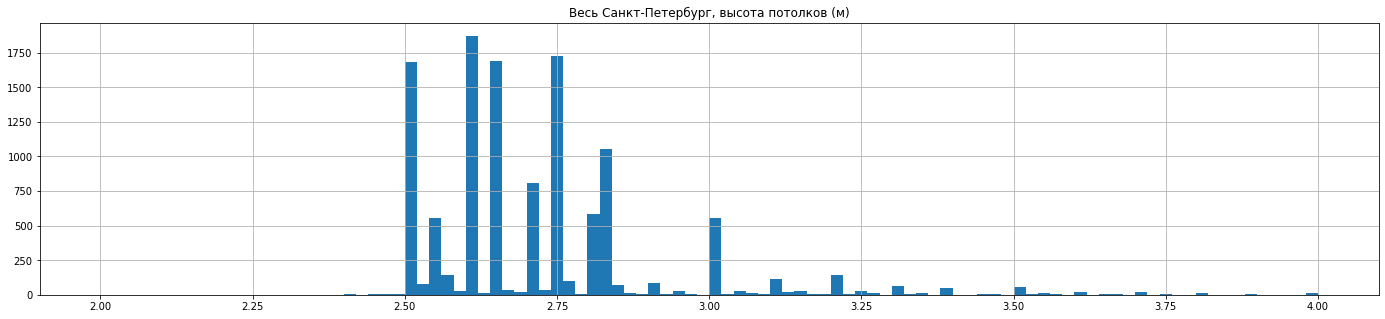

In [57]:
stp.query('center_km <= 6')['ceiling_height'].hist(bins=100, figsize=(24,5))
plt.title('Центр Санкт-Петербурга, высота потолков (м)')
plt.show()
stp['ceiling_height'].hist(bins=100, figsize=(24,5))
plt.title('Весь Санкт-Петербург, высота потолков (м)')
plt.show()

В центре больше часть высоких потолков и больше разброс высоты потолков, чем в городе в целом.

Корреляция: 0.48


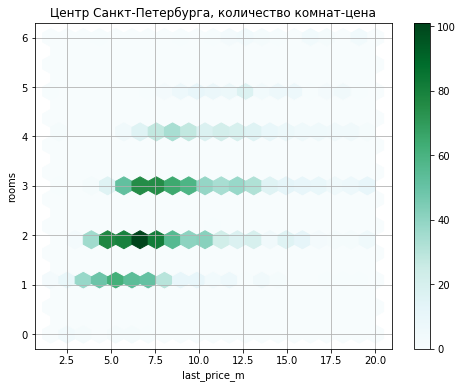

Корреляция: 0.54


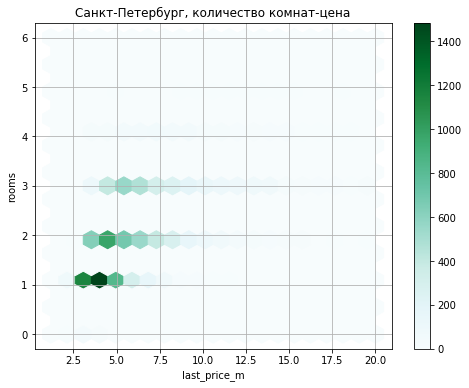

In [58]:
stp.query('center_km <= 6').plot(x='last_price_m', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
print('Корреляция:', round(stp.query('center_km <= 6')['last_price_m'].corr(stp.query('center_km <= 6')['rooms']), 2))
plt.title('Центр Санкт-Петербурга, количество комнат-цена')
plt.show()
stp.plot(x='last_price_m', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
print('Корреляция:', round(stp['last_price_m'].corr(stp['rooms']), 2))
plt.title('Санкт-Петербург, количество комнат-цена')
plt.show()

Количество комнат в центре чуть слабее коррелирует с ценой, чем в целом по городу. Параметр незначительно отличается от базы в целом (0,5).

другой count    1300.000000
mean        9.181821
std         3.676091
min         1.800000
25%         6.500000
50%         8.400000
75%        11.329750
max        20.000000
Name: last_price_m, dtype: float64
первый count    251.000000
mean       6.871260
std        3.165183
min        1.600000
25%        4.775000
50%        6.000000
75%        8.050000
max       18.280000
Name: last_price_m, dtype: float64
последний count    328.000000
mean       8.731881
std        3.431010
min        2.990000
25%        6.200000
50%        8.000000
75%       10.537500
max       19.600000
Name: last_price_m, dtype: float64


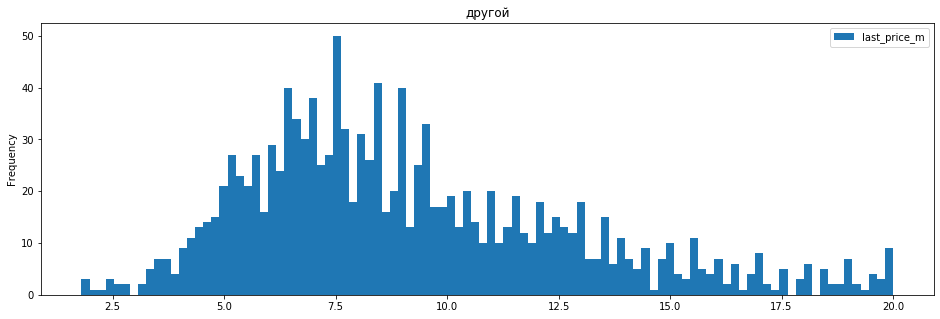

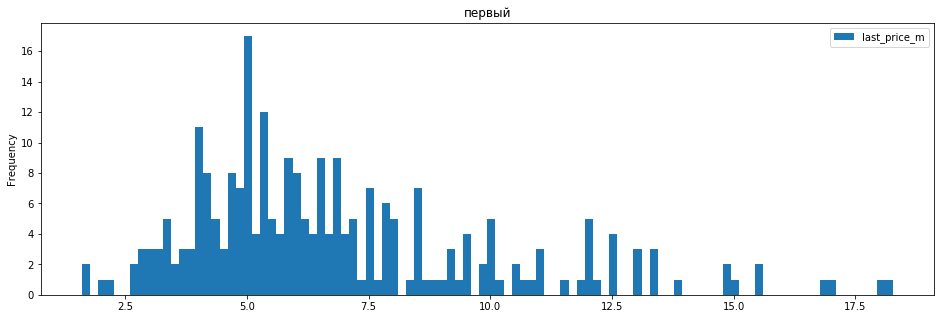

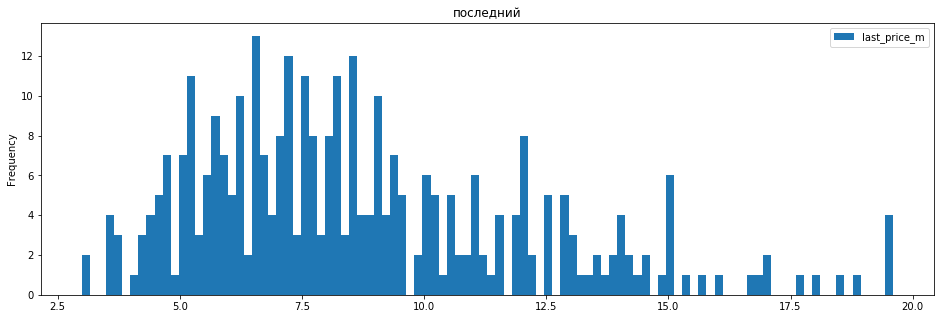

In [59]:
for group, group_data in stp.query('center_km <= 6').groupby('floor_status'):
    print(group, group_data['last_price_m'].describe())
    group_data.plot(y='last_price_m', title=group, kind='hist', bins=100, figsize=(16,5))

В центре наименьшей популярностью пользуются квартиры на первом этаже. Квартиры на всех этажах, кроме первого и последнего, дороже.

другой count    9350.000000
mean        6.194788
std         3.057403
min         1.800000
25%         4.100000
50%         5.244500
75%         7.250000
max        20.000000
Name: last_price_m, dtype: float64
первый count    1215.000000
mean        5.177128
std         2.437422
min         1.190000
25%         3.660000
50%         4.550000
75%         5.900000
max        20.000000
Name: last_price_m, dtype: float64
последний count    1385.000000
mean        6.140505
std         3.148996
min         1.900000
25%         3.950000
50%         5.100000
75%         7.305000
max        19.900000
Name: last_price_m, dtype: float64


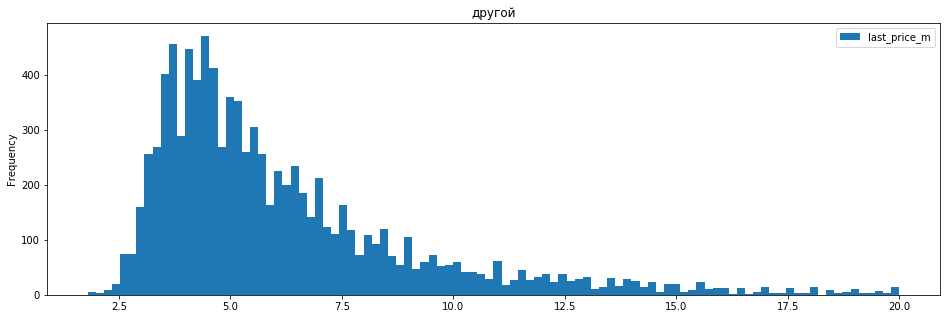

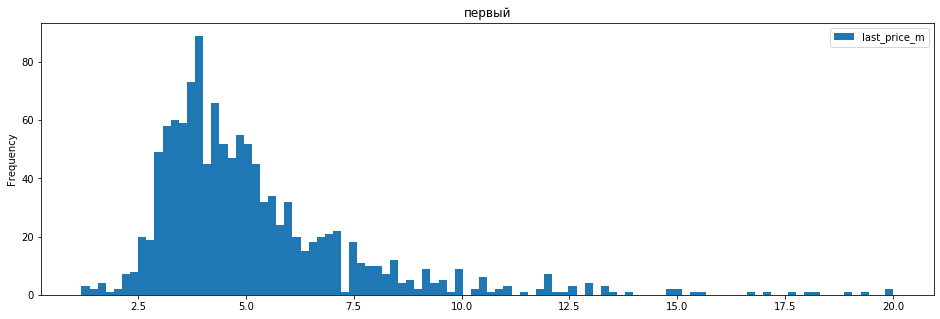

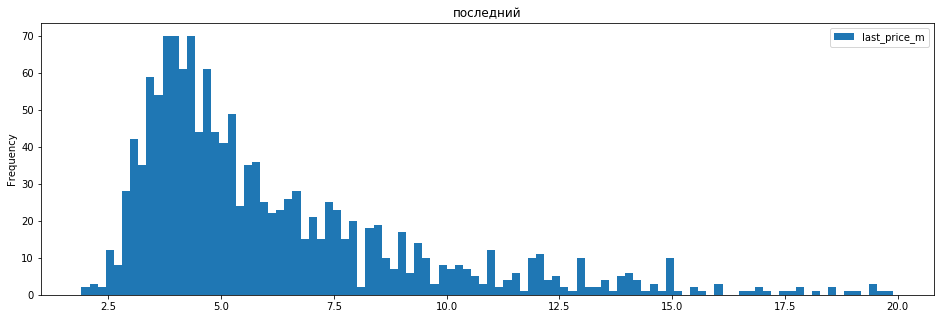

In [60]:
for group, group_data in stp.groupby('floor_status'):
    print(group, group_data['last_price_m'].describe())
    group_data.plot(y='last_price_m', title=group, kind='hist', bins=100, figsize=(16,5))

Ситуация с последними этажами по городу в целом выравнивается. Вероятно, в центре низкая популярность последних этажей обоснована старым жилым фондом.

Корреляция: -0.11


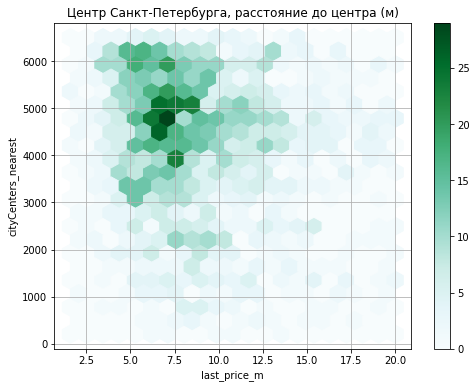

Корреляция: -0.39


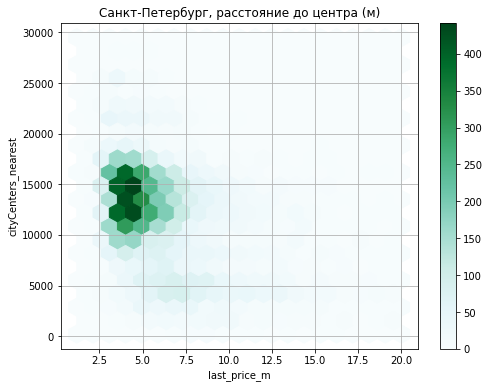

In [61]:
stp.query('center_km <= 6').plot(x='last_price_m', y='cityCenters_nearest', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
print('Корреляция:', round(stp.query('center_km <= 6')['last_price_m'].corr(stp.query('center_km <= 6')['cityCenters_nearest']), 2))
plt.title('Центр Санкт-Петербурга, расстояние до центра (м)')
plt.show()
stp.plot(x='last_price_m', y='cityCenters_nearest', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
print('Корреляция:', round(stp['last_price_m'].corr(stp['cityCenters_nearest']), 2))
plt.title('Санкт-Петербург, расстояние до центра (м)')
plt.show()

В Санкт-Петербурге корреляция цены с расстоянием от центра выше, чем во всей базе (-0,39 против -0,31). В центре эта корреляция низкая, как мы раньше предполагали - это может быть связано с наличием большого количество коммунальных квартир со старым жилым фондом.

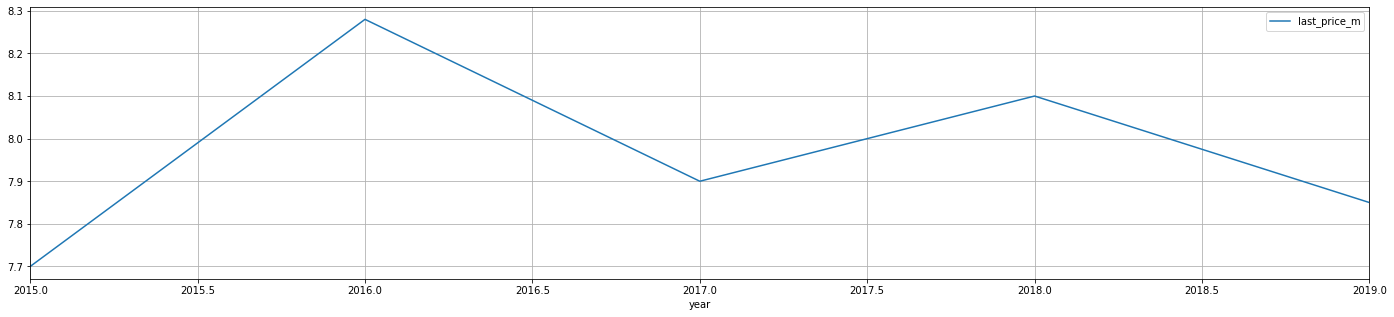

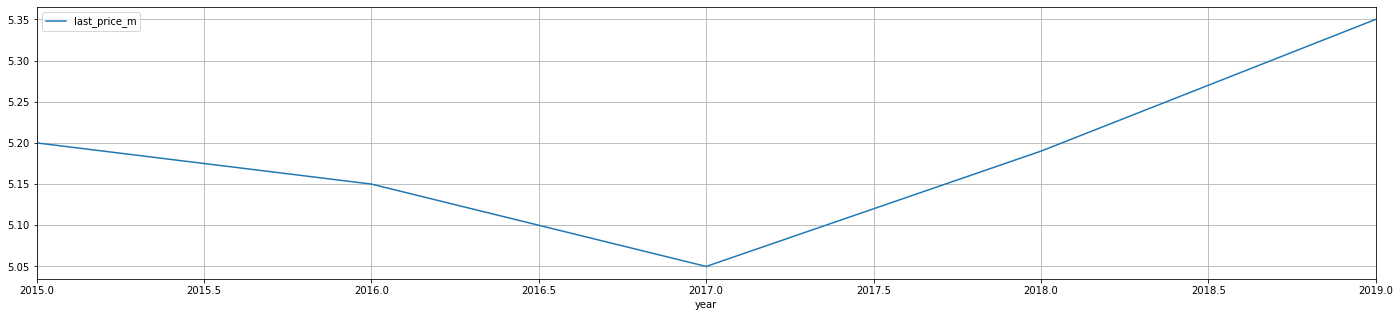

In [62]:
(stp
         .query('center_km <= 6')
         .pivot_table(index='year', values='last_price_m', aggfunc='median')
         .plot(grid=True, figsize=(24,5))

)
plt.show()
(stp
         .pivot_table(index='year', values='last_price_m', aggfunc='median')
         .plot(grid=True, figsize=(24,5))

)
plt.show()

По Санкт-Петербургу изменение цен по годам похоже на то, что мы видели по базе в целом: падение к 2017 году и резкий рост к 2019. В центре наоборот был рост к 2016, а падение оказалось не таким большим. При этом к 2019 году цены снизились. С одной стороны можно сказать, что цены на квартиры в центре Петербурга устойчивее к кризисам. С другой - что спрос на жилье в Петербурге к 2019 году значительно вырос, популярны стали не только центральные районы.

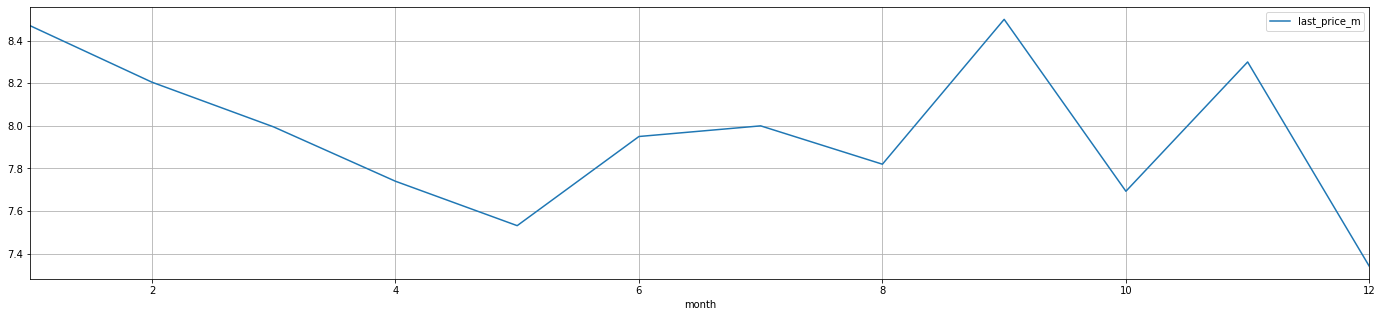

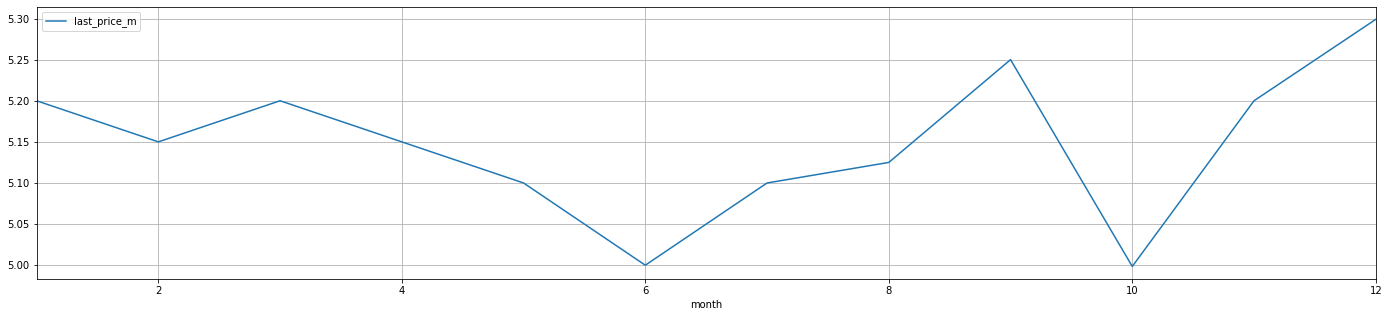

In [63]:
(stp
         .query('center_km <= 6')
         .pivot_table(index='month', values='last_price_m', aggfunc='median')
         .plot(grid=True, figsize=(24,5))

)
plt.show()
(stp
         .pivot_table(index='month', values='last_price_m', aggfunc='median')
         .plot(grid=True, figsize=(24,5))

)
plt.show()

Динамика цен по месяцам схожа. Различается только конец года: в центре к декабрю цены падают, во всем городе наоборот растут.

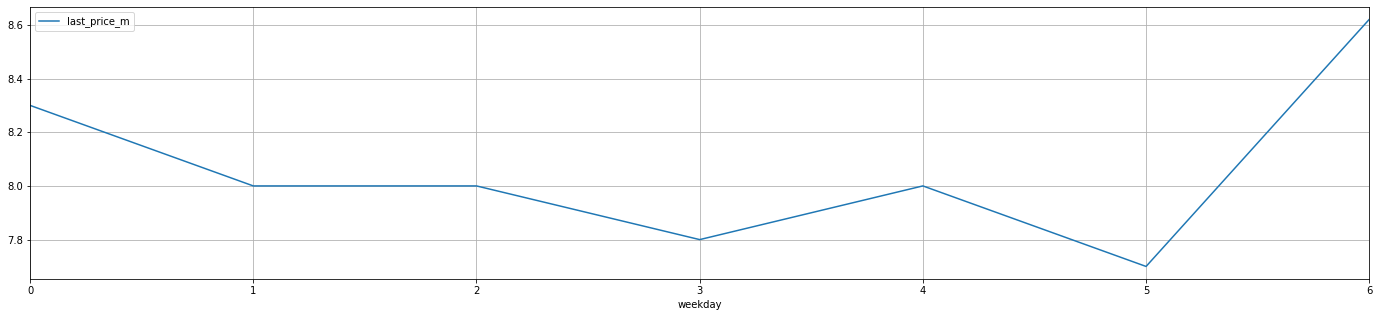

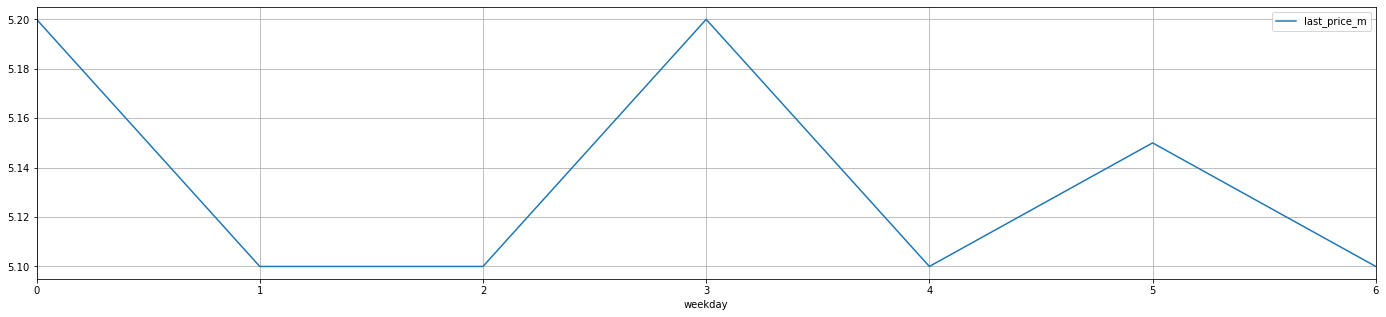

In [64]:
(stp
         .query('center_km <= 6')
         .pivot_table(index='weekday', values='last_price_m', aggfunc='median')
         .plot(grid=True, figsize=(24,5))

)
plt.show()
(stp
         .pivot_table(index='weekday', values='last_price_m', aggfunc='median')
         .plot(grid=True, figsize=(24,5))

)
plt.show()

Объявления о квартирах в центре, размещенные в воскресенье сильно дороже, в целом по городу нет какой-то явной тенденции.

<a id="conclusion_5"></a>
### Вывод
- В центре Санкт-Петербурга цены выше, чем в остальном городе, но в диапазоне 2-3 км достаточно много объявлений с низкими ценами. Возможно, это коммунальные квартиры со старым жилым фондом.
- Квартиры на последнем этаже в центре менее популярны, чем в остальном городе.
- Цена связана с количеством комнат примерно так же, как и во всей базе (около 0,5).
- Квартиры в центре устойчивее к перепадам цен на рынке в целом.
- В 2018-2019 году в Петербурге выросли цены на недвижимость. Возможно, это связано с повышенным спросом и со строительством жилых комплексов бизнес-класса (всплеск цен на 27 км от центра) 

<a id="conclusion_final"></a>
## Общий вывод
Проанализирован рынок недвижимости Санкт-Петербурга и пригородов по данным Яндекс.Недвижимости за 2015-2019 годы. Оценены параметры, влияющие на цену недвижимости. Отдельно рассмотрен Санкт-Петербург в разрезе центр-весь город.

Результаты анализа:

- Цена квартиры сильно связана с площадью
- Расстояние до центра города влияет достаточно слабо (-0,35 во всей базе, -0,39 в Петербурге) 
- Цены на последнем и первом этаже в среднем ниже, чем на остальных
- Самый большой разброс цен у квартир на последнем этаже
- С 2015 по 2017 год цены падали, к 2019 они обогнали цены 2015го года
- Центр Петербурга оказался устойчив к кризису цен 2015-2017 годов
- С апреля по август цены падают; вероятно, растет предложение, а собственники заинтересованы быстрее продать недвижимость
- В Петербурге цены падают с начала года до июня, потом начинают расти.